In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('E:/videogame/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape #16719 rows, 16 columns. Get to know your data size for efficient analysis

(16719, 16)

In [4]:
df.columns  #get all the columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
#rename the columns to avoid confusion.
df.rename(columns={'EU_Sales' : 'Europe_Sales', 'NA_Sales' : 'N.America_Sales', 'JP_Sales' : 'Japan_Sales'},  inplace=True)

In [6]:
df.head(10) # take a look at the data.I have chosen first 7 rows

,Name,Platform,Year_of_Release,Genre,Publisher,N.America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
N.America_Sales    16719 non-null float64
Europe_Sales       16719 non-null float64
Japan_Sales        16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
df.describe() #very important step in data analysis. Gives you a clear idea of sales and numerical figures

,Year_of_Release,N.America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
#filter out the game with most Global sales
filterr = (df['Global_Sales']==df['Global_Sales'].max())
df['Name'][filterr]  #Wii Sports rules

0    Wii Sports
Name: Name, dtype: object

In [10]:
df['Publisher'].value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Games Workshop                     1
Simon & Schuster Interactive       1
Havas Interactive                  1
Fortyfive                          1
PM Studios                         1
Name: Publisher, Length: 581, dtype: int64

In [11]:
Publisher_get = df.groupby(['Publisher'])
Publisher_get.get_group('Electronic Arts')
#For the sports lovers. the data below gives you look at all the games by EA_Sports


,Name,Platform,Year_of_Release,Genre,Publisher,N.America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
81,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.01,0.13,1.97,8.16,88.0,37.0,6.6,348.0,Electronic Arts,E
85,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.99,6.42,0.00,0.60,8.01,86.0,75.0,7.6,886.0,The Sims Studio,T
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5,398.0,"EA Sports, EA Vancouver",E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,Tiger Woods PGA Tour 2005,PC,2004.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,91.0,16.0,4.5,39.0,Headgate,E
16489,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Electronic Arts,T
16491,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16510,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
filt = (df['Japan_Sales']==df['Japan_Sales'].max())
df['Publisher'][filt]  #Nintendo company rules iN japan 
#In other regions Wii game has the highest sales

4    Nintendo
Name: Publisher, dtype: object

In [13]:
print(df['Japan_Sales'].isna().sum())
print(df['Publisher'].isna().sum()) #Publisher has a lot of empty values lets clean it up

0
54


In [14]:
type(np.nan) #Nan values create problems as they are float and rest of values are integers

float

Text(0.5, 1, 'Popularity of Famous Games')

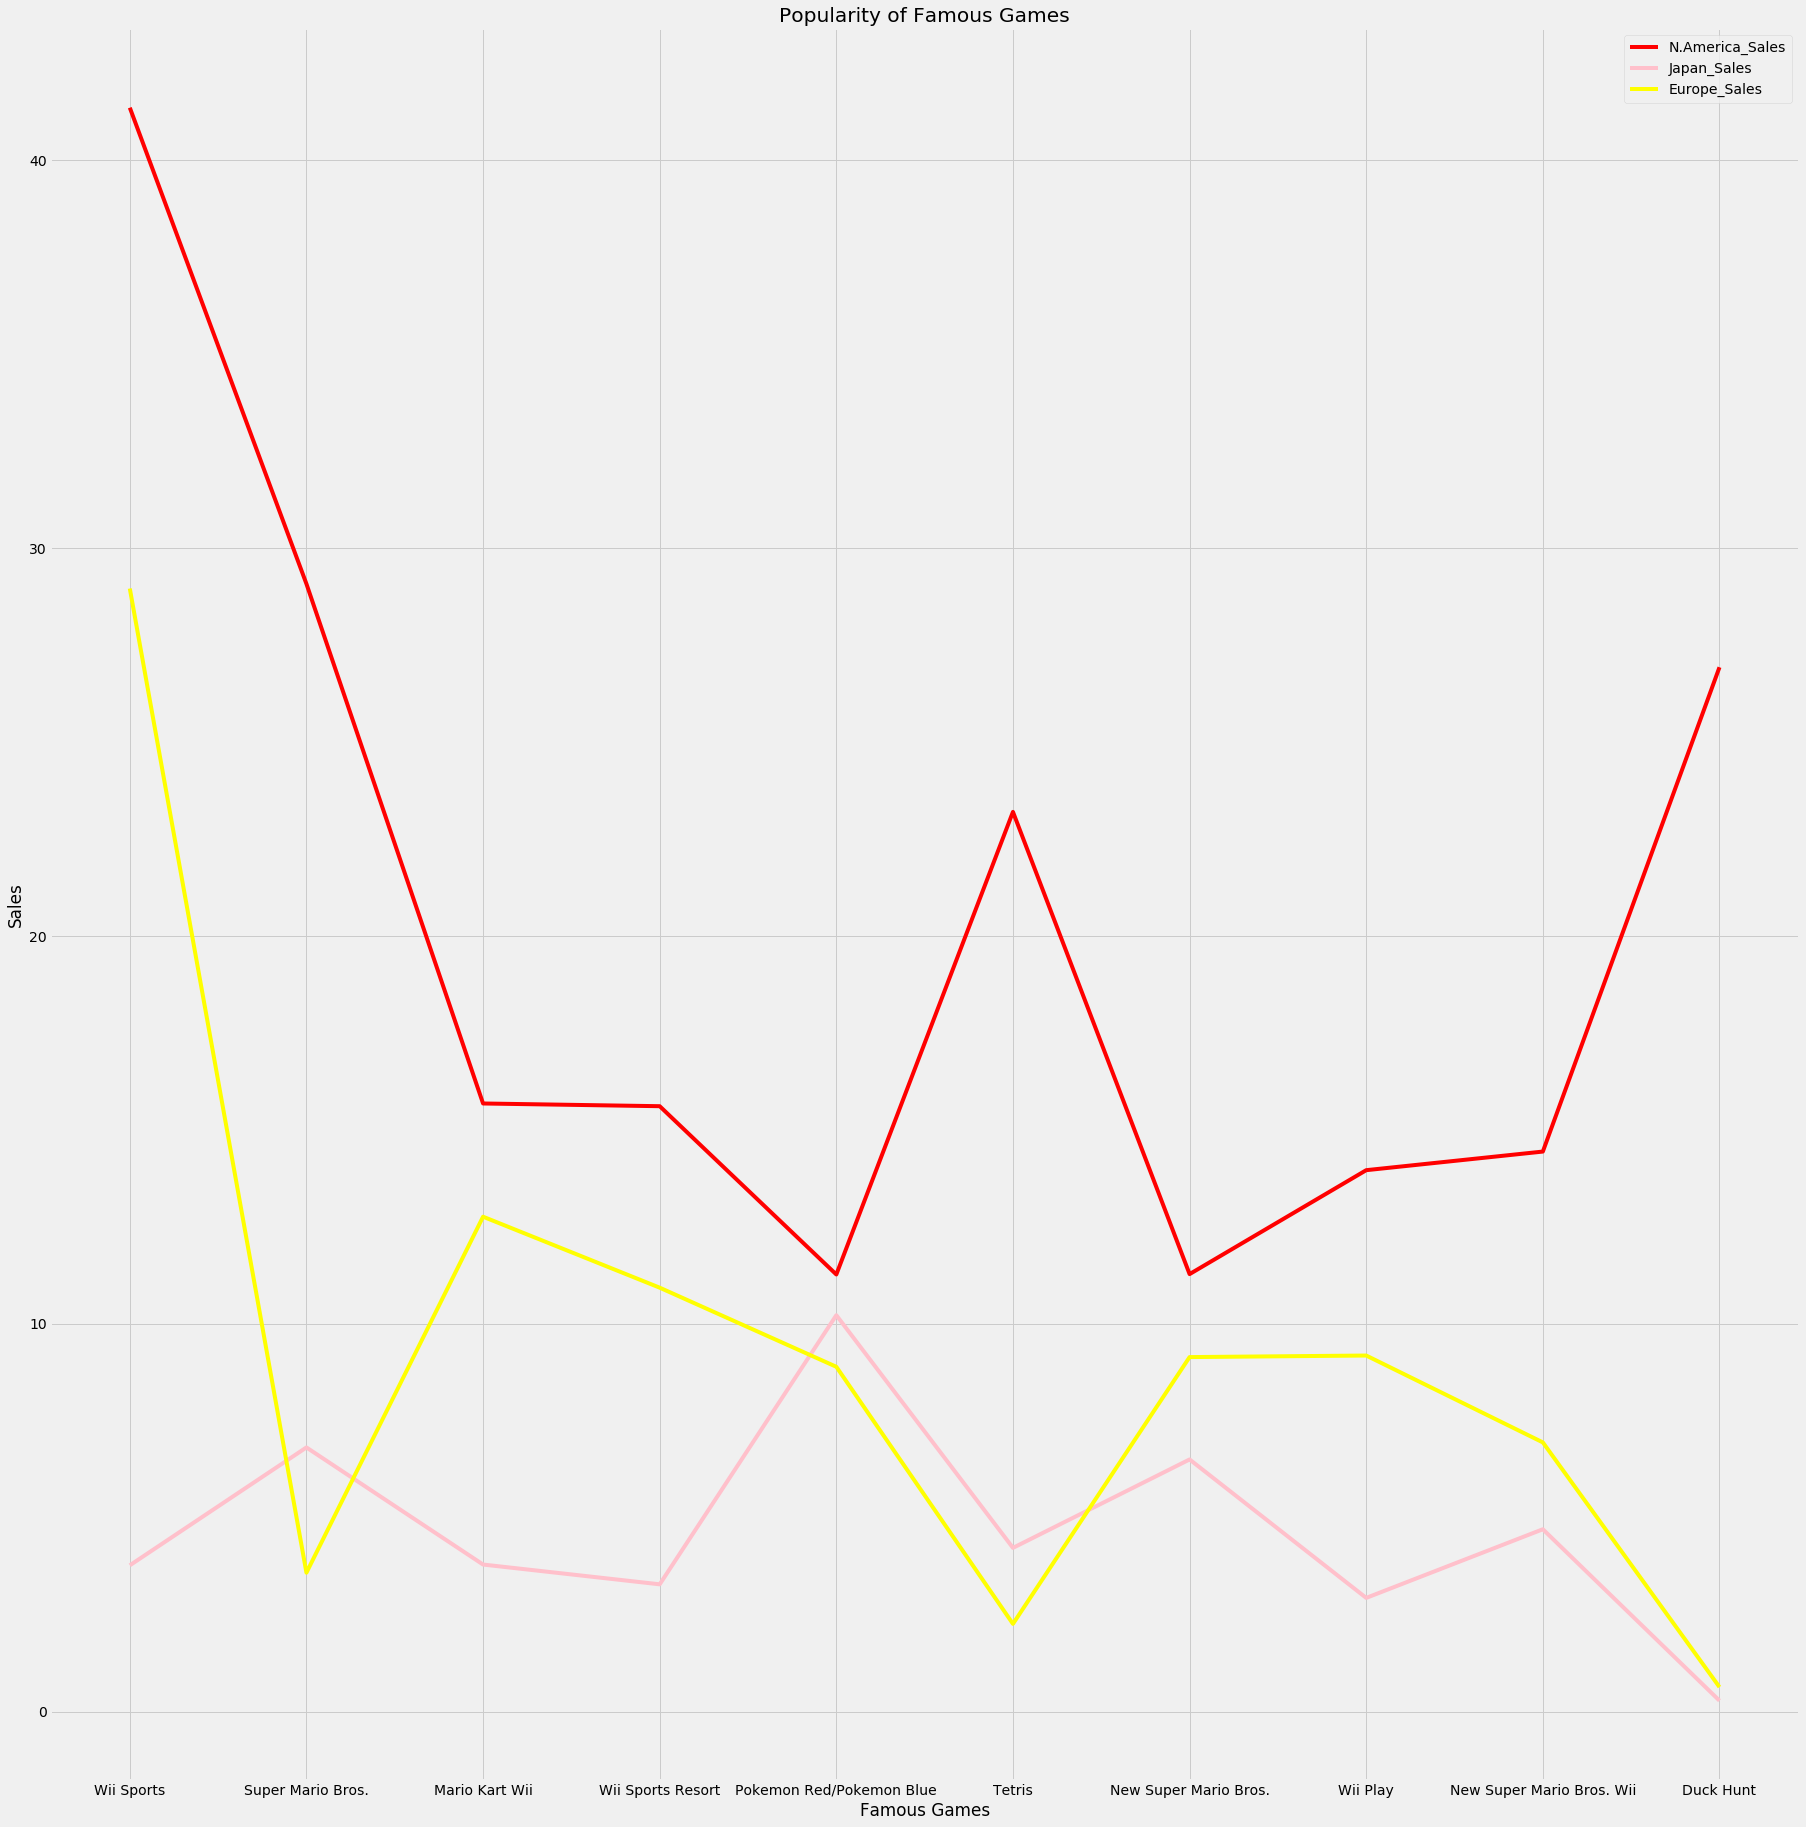

In [47]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,25))
plt.plot(df['Name'].head(10), df['N.America_Sales'].head(10), color='red', label='N.America_Sales')
plt.plot(df['Name'].head(10), df['Japan_Sales'].head(10), color ='pink', label='Japan_Sales')
plt.plot(df['Name'].head(10), df['Europe_Sales'].head(10), color='yellow', label='Europe_Sales')
plt.tight_layout()
plt.legend()
plt.xlabel('Famous Games')
plt.ylabel('Sales')
plt.title('Popularity of Famous Games')

In [16]:
df.Publisher = df.Publisher.fillna('')
df.Publisher.isna().sum() #Cleared Nan values with empty string

0

In [17]:
Nin = (df['Publisher']=='Nintendo')
EA = (df['Publisher']=='Electronic Arts')
#filtering out EA sports and Nintendo to compare which compay dominates

In [18]:
#Nintendo sales across various regions
print(df['Japan_Sales'][Nin].sum())
print(df['Europe_Sales'][Nin].sum())
print(df['N.America_Sales'][Nin].sum())
print(df['Global_Sales'][Nin].sum())

458.15
419.01
816.9700000000001
1788.81


In [19]:
#EA sales across various regions
print(df['Japan_Sales'][EA].sum())
print(df['Europe_Sales'][EA].sum())
print(df['N.America_Sales'][EA].sum())
print(df['Global_Sales'][EA].sum())



14.350000000000001
373.90999999999997
599.5
1116.96


In [20]:
#Lets analyse the Genre of Video Games which are popular
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [21]:
df['Genre'].fillna('Unknown', inplace = True) #Nan values replaced with "Unknown string"

In [22]:
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle', 'Unknown']            

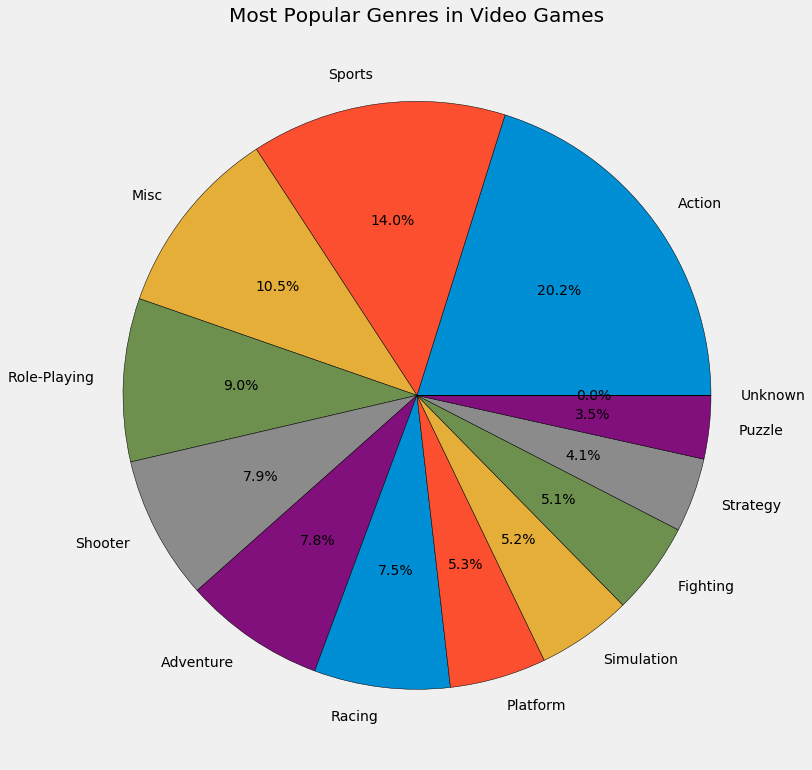

In [49]:
#Most popular games produced are of Action Genre followed by Sports
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(df['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


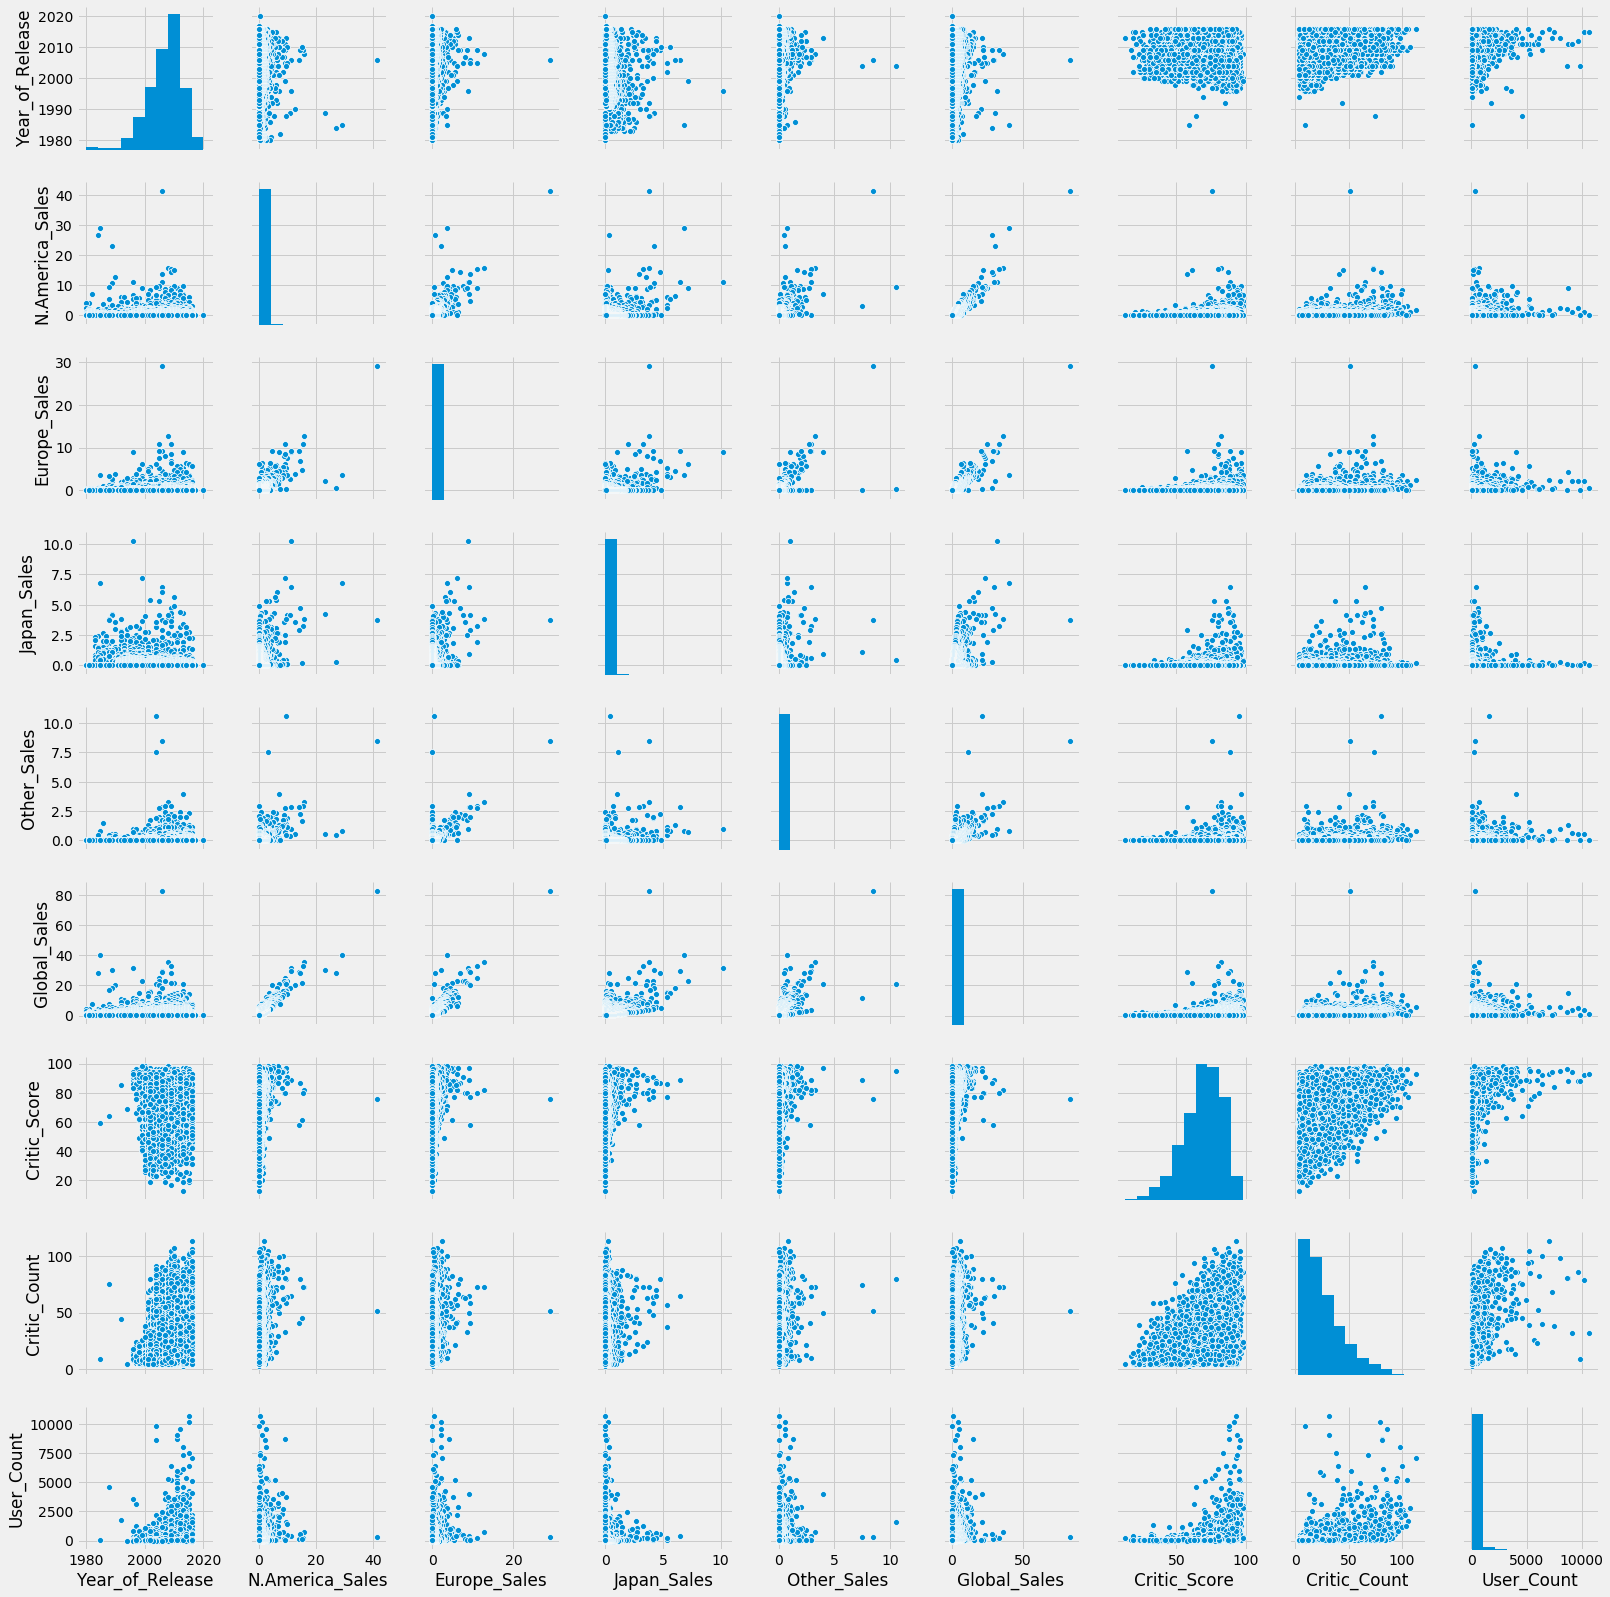

In [24]:
t  = sns.pairplot(df)
t 
#analyse the paiplots

In [25]:
df['Critic_Score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16714     NaN
16715     NaN
16716     NaN
16717     NaN
16718     NaN
Name: Critic_Score, Length: 16719, dtype: float64

In [26]:
df['Critic_Score'].isna().sum() #lots of values in Critic score

8582

In [27]:
df['Critic_Score'].median()

71.0

In [28]:
#Replace Nan values in Critic_score with median Values
df['Critic_Score'].fillna(71, inplace=True)

In [29]:
df['Critic_Score'].max()

98.0

In [30]:
filtera = (df['Critic_Score']==df['Critic_Score'].max())


In [31]:
df['Name'][filtera] #best games according to critic scores

51           Grand Theft Auto IV
57           Grand Theft Auto IV
227     Tony Hawk's Pro Skater 2
5350                 SoulCalibur
Name: Name, dtype: object

In [32]:
"""So GTA, Tony Hawk's Pro Skater 2 and SoulCalibur dominate when it comes to Critics ratings.So these are the games you should
loook out for next time you go game shopping"""

"So GTA, Tony Hawk's Pro Skater 2 and SoulCalibur dominate when it comes to Critics ratings.So these are the games you should\nloook out for next time you go game shopping"

In [33]:
df['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [34]:
df['Rating'].isna().sum() #Nan values which create the problems

6769

In [35]:
games_with_no_rating  = df['Rating'].isna()
df['Name'][games_with_no_rating] 
#the games with no ratings are mostly normal games which everyone can play and not adult games

1                    Super Mario Bros.
4             Pokemon Red/Pokemon Blue
5                               Tetris
9                            Duck Hunt
10                          Nintendogs
                     ...              
16714    Samurai Warriors: Sanada Maru
16715                 LMA Manager 2007
16716          Haitaka no Psychedelica
16717                 Spirits & Spells
16718              Winning Post 8 2016
Name: Name, Length: 6769, dtype: object

In [36]:
#Replace Nan values with E Rating i.e Everyone can play it
df['Rating'].fillna('E', inplace=True)
df['Rating'].value_counts()
list(df['Rating'].value_counts())

[10760, 2961, 1563, 1420, 8, 3, 3, 1]

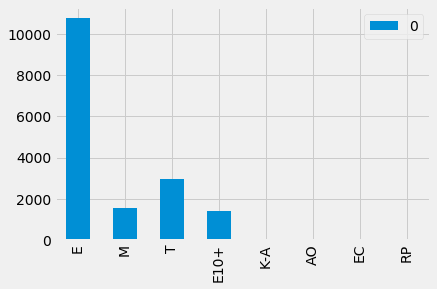

In [63]:
from collections import Counter
a = list(df['Rating'])
letter_counts = Counter(a)
d = pd.DataFrame.from_dict(letter_counts, orient='index')


d.plot(kind='bar')

In [38]:
#In the above Barplot E rating dominates which signifies most games made in industries are for people of all ages.

In [39]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,N.America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,NaN,NaN,NaN,NaN,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,NaN,NaN,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,71.0,NaN,NaN,NaN,NaN,E
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,71.0,NaN,NaN,NaN,NaN,E
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,71.0,NaN,NaN,NaN,NaN,E
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,71.0,NaN,NaN,NaN,NaN,E


In [40]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')

In [41]:
df['Year_of_Release'].min()

Timestamp('1980-01-01 00:00:00')

In [42]:
df['Year_of_Release'].max()

Timestamp('2020-01-01 00:00:00')